# Explore Exercises

## Zillow

Create a python script or jupyter notebook named explore_zillow that does the following:

Plot all continuous or numeric/ordered variables against each other in scatterplots, or through a pairplot.

Plot a correlation matrix heatmap.

Plot latitude agains longitude.

Create a useable plot with 4 dimensions, e.g. x, y, color, size.

Compute the mean(logerror) by zipcode and the overall mean(logerror). Write a loop that will run a t-test between the overall mean and the mean for each zip code. We want to identify the zip codes where the error is significantly higher or lower than the expected error.

Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

In [1]:
# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Exploring
import scipy.stats as stats

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import learning_curve

pd.options.display.float_format = '{:20,.2f}'.format

import acquire
import summarize
import prepare
import explore
import wrangle_zillow


(28971, 22) (12417, 22) (10347, 22)
(28971, 22)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 28971 entries, 25135 to 65158
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      28971 non-null  int64  
 1   propertylandusetypeid         28971 non-null  float64
 2   bathroomcnt                   28971 non-null  float64
 3   bedroomcnt                    28971 non-null  float64
 4   calculatedfinishedsquarefeet  28971 non-null  float64
 5   fips                          28971 non-null  float64
 6   fullbathcnt                   28971 non-null  float64
 7   latitude                      28971 non-null  float64
 8   longitude                     28971 non-null  float64
 9   propertycountylandusecode     28971 non-null  object 
 10  rawcensustractandblock        28971 non-null  float64
 11  regionidcounty                28971 non-null  float64
 12  regionid

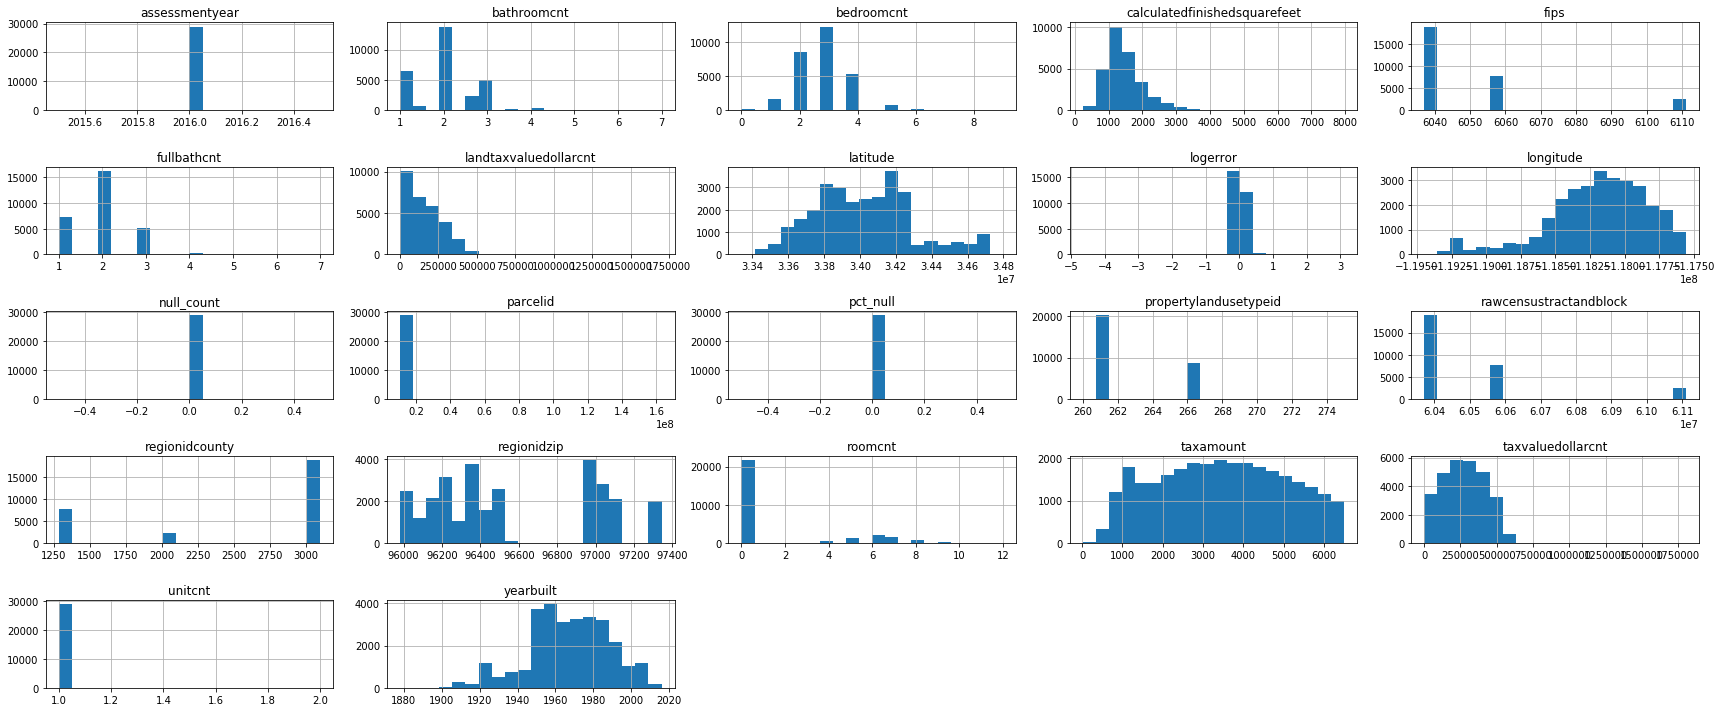

None [[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff65d4d9d90>
  <matplotlib.axes._subplots.AxesSubplot object at 0x7ff645db8a90>]] None


In [2]:
# get the currently prepared dataset
# NOTE: the dataset IS scaled but NOT split at this point

train, validate, test = wrangle_zillow.wrangle_zillow_cluster()



In [3]:
train.head()

,parcelid,propertylandusetypeid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,fullbathcnt,latitude,longitude,propertycountylandusecode,...,regionidzip,roomcnt,unitcnt,yearbuilt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,propertylandusedesc
25135,10838455,261.00,2.00,3.00,"1,538.00","6,037.00",2.00,"34,192,880.00","-118,472,683.00",0100,...,"96,415.00",0.00,1.00,"1,978.00","486,000.00","2,016.00","297,000.00","5,899.50",-0.11,Single Family Residential
56517,12819457,261.00,2.00,3.00,"1,041.00","6,037.00",2.00,"34,010,093.00","-117,968,564.00",0100,...,"96,489.00",0.00,1.00,"1,956.00","310,760.00","2,016.00","220,587.00","3,737.30",0.01,Single Family Residential
56070,12643639,266.00,2.00,2.00,961.00,"6,037.00",2.00,"33,757,017.00","-118,298,505.00",010C,...,"96,222.00",0.00,1.00,"1,982.00","299,000.00","2,016.00","184,000.00","3,682.85",-0.01,Condominium
13963,13931566,261.00,2.00,3.00,"1,221.00","6,059.00",2.00,"33,795,705.00","-117,950,061.00",122,...,"97,047.00",6.00,1.00,"1,955.00","218,908.00","2,016.00","149,028.00","2,819.22",0.17,Single Family Residential
4795,12255644,261.00,2.00,3.00,"1,489.00","6,037.00",2.00,"33,888,652.00","-118,268,602.00",0100,...,"96,105.00",0.00,1.00,"1,959.00","49,857.00","2,016.00","14,469.00","1,036.98",-0.04,Single Family Residential
